## High-Pass Low-Pass for DCT

In [1]:
import scipy
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy.fftpack

In [2]:
# read the image
def read_image(image_name,method):
    image = Image.open(image_name)
    image = image.convert(method)
    image_data = np.array(image)
    image_data_row = len(image_data)
    image_data_col = len(image_data[0])
    return (image_data,image_data_row,image_data_col)

<img src='Boats.png'>

In [3]:
boat_image_info = read_image('Boats.png','L')

In [4]:
# print(a)

I used the DCT function to generatethe frequency plot.

For the DCT package from the fftpack, since it only applies a 1 dimentional DCT, we need to do it twice, and transpose is needed.

In [5]:
boat_dct = scipy.fftpack.dct(scipy.fftpack.dct(boat_image_info[0].T,norm='ortho').T,norm='ortho')

For a single DCT, it basically did:
$$
\begin{align}
y[k] = & 2 \sum_{n=0}^{N-1}x[n]cos(\frac{\pi k (2n+1)}{(2*N)}) \\ 
& 0 \leq k < N
\end{align}
$$
And if we use the tag "ortho", it will normalize it.
$$
\begin{align}
f = & \sqrt{(1/(4*N))}\quad if\ k = 0, \\
f = & \sqrt{(1/(2*N))}\quad otherwise.
\end{align}
$$
And result = y[k] $\times$ f 
<br>
Source: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.dct.html

In [6]:
# print(b)

And we can normalize it with the log, so the data won't be too big, and can be shown in a plot.

In [7]:
boat_dct_log = np.log(abs(boat_dct))

In [8]:
print(boat_dct_log)

[[ 1.11036101e+01  8.70223973e+00  7.66140072e+00 ...  3.61189513e+00
   1.78784981e+00  2.25019272e+00]
 [ 8.84291580e+00  7.63219438e+00  4.89575979e+00 ...  2.48687546e+00
   1.74499209e+00 -1.71303546e-01]
 [ 8.77646445e+00  8.24189490e+00  6.04197439e+00 ...  2.64949407e+00
   1.45439324e+00  2.85088028e+00]
 ...
 [ 8.04855340e-01 -7.80623488e-01 -5.51921474e-01 ...  2.14210538e+00
   1.76780307e+00 -1.05143620e+00]
 [ 1.61219904e+00  8.19236229e-01  4.01239223e-02 ...  2.16578904e+00
   6.67820801e-01  2.21228619e-01]
 [ 1.92190079e+00  9.34955728e-03  1.24662631e+00 ...  1.42874109e+00
   5.92247832e-01 -8.15506511e-01]]


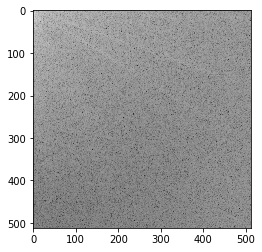

In [9]:
imgplot = plt.imshow(boat_dct_log,'gray')

We can see that the left_up corner is much brighter, which means those features' frequences are higher.

After this, we can use the IDCT to do the inverse function to check whether we are correct.
<br>
Still, we need the transpose and "ortho" tag to do the inverse correctly.

In [10]:
boat_idct = scipy.fftpack.idct(scipy.fftpack.idct(boat_dct.T,norm='ortho').T,norm='ortho')

In [11]:
print(boat_idct)

[[127. 123. 125. ... 165. 169. 166.]
 [128. 126. 128. ... 169. 163. 167.]
 [128. 124. 128. ... 178. 160. 175.]
 ...
 [112. 112. 115. ... 101.  97. 104.]
 [110. 112. 117. ... 104.  93. 105.]
 [113. 115. 121. ... 102.  95.  97.]]


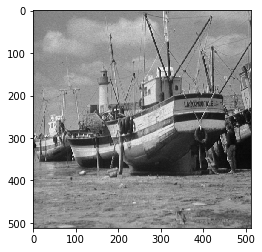

In [12]:
imgplot = plt.imshow(boat_idct,'gray')

Let's see if there are any difference between the original image and the inversed one.

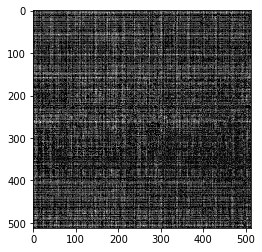

In [13]:
boat_diff_dct_idct = boat_image_info[0] - boat_idct
imgplot = plt.imshow(abs(boat_diff_dct_idct),'gray')

There are some difference between, but for most of the image, there are no differences or the differences are small.

This is the DCT basis:
<img src='basis8.png'>
Source = https://edoras.sdsu.edu/doc/matlab/toolbox/images/transfo6.html
<br>
From this iamge we can see that all the basis. We noticed that the left-upper corner is very simple, most of them do not have many pixel changes. On the opposite side, the down-right corner is very complex. Some of them are chessboard like. This means, if a basis around the down-right corner got a very high frequency, then this kind of features do exist a lot in that image, but if the basis around the upper-left corner, it is just describing the basic information, like how many white pixels it contains. Thus, the more to the left and up, the more basic information it describes, the more to the right and down, the more detailed information it describes.

A Low-pass filter is to blurring the image, sometimes it can get rid off some noises. That's why we need to set all numbers in the right corner to 0. Thus, the detailed information, including the noises, won't exsit in the image, and only basic information, like apporixmate shape, of color, will "pass" the filter.

In [14]:
low_scale = 1/10
boat_image,rows,cols = boat_image_info
# data_copy = np.zeros(rows,cols)
# print(rows)
boat_dct_low = np.zeros((rows,cols))
boat_dct_low[0:int(rows*low_scale),0:int(cols*low_scale)] = boat_dct[0:int(rows*low_scale),0:int(cols*low_scale)]
boat_dct_low_log = np.log(abs(boat_dct_low))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [15]:
# print(boat_dct_low)
# print(boat_dct_low_log)

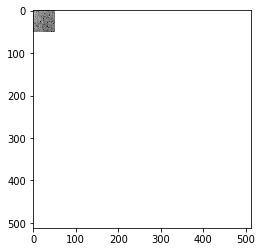

In [16]:
imgplot = plt.imshow(boat_dct_low_log,'gray')

Now we can use the IDCT to do the inverse to see the result.

In [17]:
boat_idct_low = scipy.fftpack.idct(scipy.fftpack.idct(boat_dct_low.T,norm='ortho').T,norm='ortho')

In [18]:
# print(boat_idct_low)

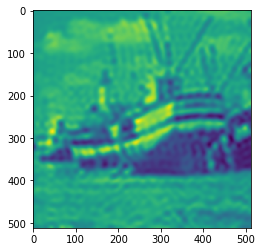

In [19]:
imgplot = plt.imshow(boat_idct_low)

We see that it did something for blurring the image.

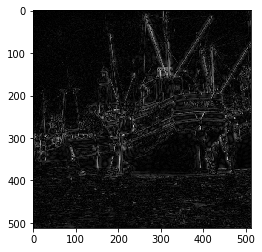

In [20]:
boat_low_image_diff = abs(boat_image_info[0] - boat_idct_low)
imgplot = plt.imshow(boat_low_image_diff,'gray')

We see that the edges have been removed from the image, which indicates that the function blurred the image.

And for the high-pass, we need to do the opposite. The high-pass filter is to amplify the detailed information for the image, sometimes it could be noises. Thus, we need to remove the basic information, so the rest can be amplified.

In [21]:
scale_high = 1/10
boat_image,rows,cols = boat_image_info
# print(rows)
boat_dct_high = np.copy(boat_dct)
for i in range(0,int(rows*scale_high)):
    for j in range(0,int(cols*scale_high)):
        boat_dct_high[i][j] = 0.0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


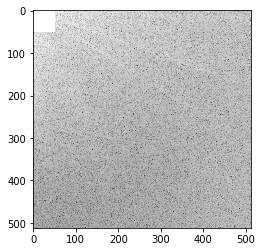

In [22]:
imgplot = plt.imshow(np.log(abs(boat_dct_high)),'gray')

In [23]:
boat_idct_high = scipy.fftpack.idct(scipy.fftpack.idct(boat_dct_high.T,norm='ortho').T,norm='ortho')

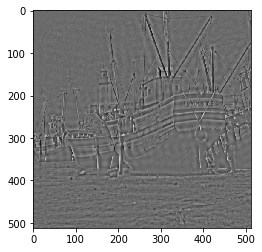

In [24]:
imgplot = plt.imshow(boat_idct_high,'gray')

We can see the edges are being picked out, those are detailed information for this image.

To prove all the work are correctly done, we can add the results of low-pass and high-pass filters together.

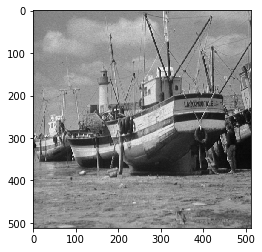

In [25]:
boat_idct_low_high = boat_idct_high + boat_idct_low
imgplot = plt.imshow(boat_idct_low_high,'gray')

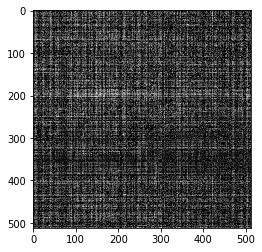

In [26]:
boat_ima_idctlh_diff = boat_image_info[0] - boat_idct_low_high
imgplot = plt.imshow(abs(boat_ima_idctlh_diff),'gray')

This is the differences between the original image and the conbination of the low and high pass inverse image. We see that it they are not exactly same to each other, but the differences are very small.